# i) Importing all required library function which helps to create model 


In [4]:
import keras, os 
from tensorflow.keras import Sequential  # This gets our NN as Sequential network  
from keras.layers import Conv2D   # apply filters to images we need convolution layer
from keras.layers import MaxPool2D  # it reduces the input size to half (helps in generalization, decreasing parameters and avoid overfitting) 
from keras.layers import Flatten  # to convert the filter 2D output into 1D which require as input to fully connected layers at the end 
from keras.layers import Dense  # the fully connected layers are implemented by using this layer 

from keras.preprocessing.image import ImageDataGenerator  # it helps to apply augmentation (rescale, rotate, zoom, flip etc.)  which is desirable when training data is small 
import numpy as np  # convert the image data into a form which makes it easy and fast to perform computations


# ii) Data Preparation and Initializing the AlexNet:

In [14]:
trdata = ImageDataGenerator()   # initialize for training data preparation 
traindata = trdata.flow_from_directory(directory= '/content/cats_and_dogs_small/train', target_size = (224, 224))  # target size is according to the input size of AlexNet  Model
tsdata = ImageDataGenerator()   # initialize for test data preparation 
testdata = tsdata.flow_from_directory(directory= '/content/cats_and_dogs_small/test', target_size = (224, 224))  # target size is according to the input size of AlexNet Model
model = keras.models.Sequential([
   keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
   keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
   keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   keras.layers.BatchNormalization(),
   keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   keras.layers.BatchNormalization(),
   keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
   keras.layers.BatchNormalization(),
   keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
   keras.layers.Flatten(),
   keras.layers.Dense(4096, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(4096, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(2, activation='softmax')
])



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# iii) Training:

In [15]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics =['accuracy']) # optimizer helps to update weight on the basis of loss computed 

model.summary()  # shows the complete AlexNet model
hist = model.fit_generator(steps_per_epoch = 10, generator =traindata, validation_data= testdata, validation_steps = 5, epochs = 10)  # steps_per_epoch is computed by total images/epoch, 
# you can visualize the test performance by using the values stored in hist like, hist.history[“accuracy”] etc 

model.save('alexnet_model.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_10 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 384)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 3s 260ms/step - loss: 44.1810 - accuracy: 0.5622 - val_loss: 7543.2998 - val_accuracy: 0.4938
Epoch 2/10
10/10 [==============================] - 2s 216ms/step - loss: 6.2327 - accuracy: 0.5043 - val_loss: 328.9229 - val_accuracy: 0.4250
Epoch 3/10
10/10 [==============================] - 2s 213ms/step - loss: 3.1678 - accuracy: 0.4807 - val_loss: 429.3914 - val_accuracy: 0.5250
Epoch 4/10
10/10 [==============================] - 2s 215ms/step - loss: 3.2695 - accuracy: 0.4710 - val_loss: 107.6901 - val_accuracy: 0.4375
Epoch 5/10
10/10 [==============================] - 2s 209ms/step - loss: 2.2188 - accuracy: 0.5325 - val_loss: 80.3930 - val_accuracy: 0.5063
Epoch 6/10
10/10 [==============================] - 2s 215ms/step - loss: 2.9084 - accuracy: 0.5257 - val_loss: 123.4181 - val_accuracy: 0.4938
Epoch 7/10
10/10 [==============================] - 2s 221ms/step - loss: 3.0824 - accuracy: 0.5739 - val_loss: 15.7062 - val_accuracy: 0.4938
Epo

In [16]:
#!unzip /content/cats_and_dogs_small.zip

# iv) Plotting the Training Progress:

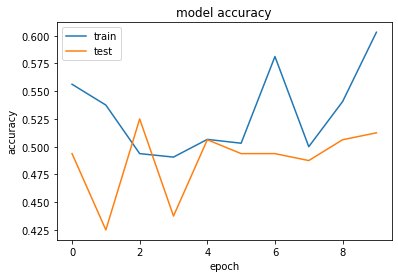

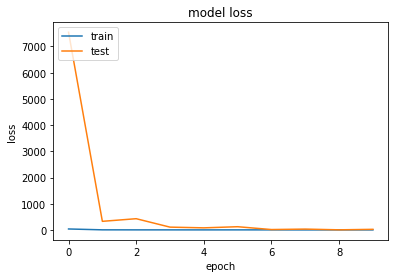

In [18]:

import matplotlib.pyplot as plt   # helps to plot the training progress 
plt.plot(hist.history['accuracy'])   # summarize history for accuracy
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])  # summarize history for loss
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# iv) Testing Model

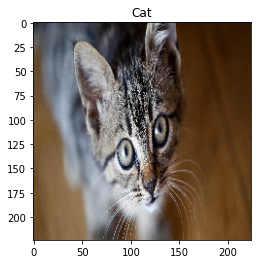

In [35]:
 
from keras.preprocessing import image  # to load test image 
img = image.load_img('/content/img.png', target_size=(224, 224))
img_o = np.asarray(img)

img = np.expand_dims(img_o, axis=0)  # because the input to Alexnet have three channels
from keras.models import load_model
saved_model = load_model('alexnet_model.h5')
output = saved_model.predict(img) 
if (np.argmax(output)==0):
  plt.title('Cat')
  
elif (np.argmax(output)==1):
   plt.title('Dog')
   
plt.imshow(img_o)